In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd

data =  pd.read_csv("/content/drive/MyDrive/BITAmin/Project/시계열1조/주요국 통화의 대원화환율_06183901.csv")
data.head()

,변환,원자료
0,2015/01/02,"1,099.20"
1,2015/01/05,"1,102.60"
2,2015/01/06,"1,108.70"
3,2015/01/07,"1,103.90"
4,2015/01/08,"1,099.70"


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   변환      2490 non-null   object
 1   원자료     2490 non-null   object
dtypes: object(2)
memory usage: 39.0+ KB


In [20]:
data['변환'] = pd.to_datetime(data['변환']).dt.normalize()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   변환      2490 non-null   datetime64[ns]
 1   원자료     2490 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 39.0+ KB


In [21]:
data['원자료'] = data['원자료'].str.replace(',', '').astype(float)
data.columns = ['ds', 'y']
data.head()

,ds,y
0,2015-01-02,1099.2
1,2015-01-05,1102.6
2,2015-01-06,1108.7
3,2015-01-07,1103.9
4,2015-01-08,1099.7


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2490 non-null   datetime64[ns]
 1   y       2490 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.0 KB


## 데이터 전처리 완료!

In [15]:
pip install prophet

In [16]:
# Python
import pandas as pd
from prophet import Prophet

In [23]:
m = Prophet()
m.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmdeeq9z3/gr4pjajz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmdeeq9z3/_s1xq1bd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83303', 'data', 'file=/tmp/tmpmdeeq9z3/gr4pjajz.json', 'init=/tmp/tmpmdeeq9z3/_s1xq1bd.json', 'output', 'file=/tmp/tmpmdeeq9z3/prophet_model857w8zrz/prophet_model-20250214172126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:21:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:21:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2850,2026-02-02
2851,2026-02-03
2852,2026-02-04
2853,2026-02-05
2854,2026-02-06


In [33]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2850,2026-02-02,1466.403354,1296.096763,1630.922756
2851,2026-02-03,1467.295836,1300.114360,1626.011359
2852,2026-02-04,1467.201015,1298.264813,1633.397608
2853,2026-02-05,1467.422639,1291.961396,1631.300502
2854,2026-02-06,1467.739371,1294.175393,1646.440084


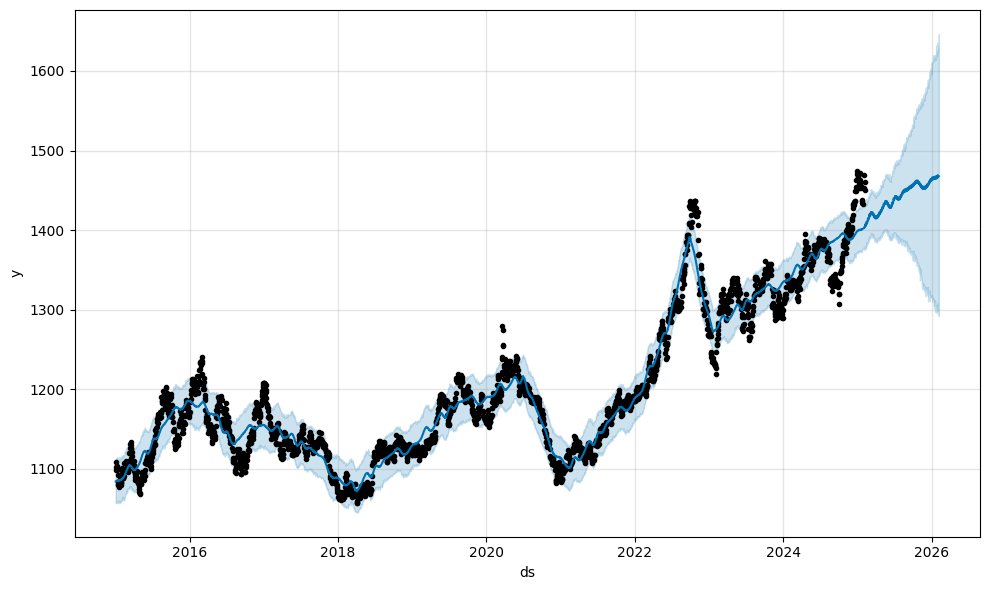

In [34]:
fig1 = m.plot(forecast)

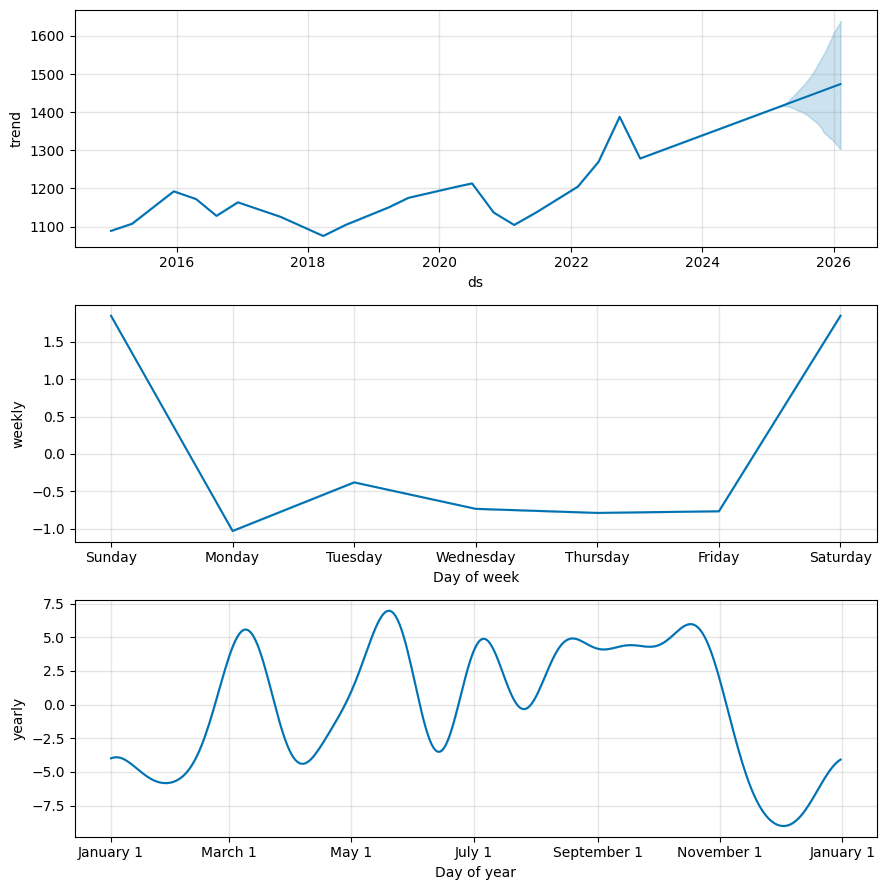

In [35]:
fig2 = m.plot_components(forecast)

In [36]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [37]:
import pandas as pd

# Define the date range
start_date = '2025-02-06'
end_date = '2026-02-06'

# Filter the DataFrame to include only rows where 'ds' is within the specified range
filtered_forecast = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] <= end_date)]
filtered_forecast= filtered_forecast[['ds','yhat','yhat_lower', 'yhat_upper']]

# Display the filtered DataFrame
filtered_forecast.tail()

,ds,yhat,yhat_lower,yhat_upper
2850,2026-02-02,1466.403354,1296.096763,1630.922756
2851,2026-02-03,1467.295836,1300.114360,1626.011359
2852,2026-02-04,1467.201015,1298.264813,1633.397608
2853,2026-02-05,1467.422639,1291.961396,1631.300502
2854,2026-02-06,1467.739371,1294.175393,1646.440084


### prophet 모델의 성능지표

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 실제 값과 예측 값 추출
y_true = data['y']  # 학습 데이터의 실제 값
y_pred = forecast['yhat'].iloc[:-365]  # 예측값에서 마지막 365일 제외한 부분

# MAE 계산
mae = mean_absolute_error(y_true, y_pred)

# RMSE 계산
rmse = mean_squared_error(y_true, y_pred)** 0.5  # RMSE는 MSE의 제곱근

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 16.409627361939897
Root Mean Squared Error (RMSE): 21.25257167939625


In [40]:
forecast_value = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]

In [41]:
# 예측 결과와 원본 데이터프레임을 'ds' 열을 기준으로 병합
prophet_prediction = pd.merge(data, forecast_value, on='ds', how='outer')
prophet_prediction

,ds,y,yhat,yhat_lower,yhat_upper
0,2015-01-02,1099.2,1084.177622,1057.093234,1111.794386
1,2015-01-05,1102.6,1084.431402,1056.965143,1112.969747
2,2015-01-06,1108.7,1085.209619,1058.676491,1113.864348
3,2015-01-07,1103.9,1084.965070,1058.717669,1113.414753
4,2015-01-08,1099.7,1085.002211,1057.811364,1110.972186
...,...,...,...,...,...
2850,2026-02-02,NaN,1466.403354,1296.096763,1630.922756
2851,2026-02-03,NaN,1467.295836,1300.114360,1626.011359
2852,2026-02-04,NaN,1467.201015,1298.264813,1633.397608
2853,2026-02-05,NaN,1467.422639,1291.961396,1631.300502


## 데이터 추출

In [43]:
# period 열 추가
prophet_prediction['period'] = range(1, len(prophet_prediction)+1)

# MAE와 RMSE 값을 모든 행에 넣기
prophet_prediction['MAE'] = mae
prophet_prediction['RMSE'] = rmse
prophet_prediction

,ds,y,yhat,yhat_lower,yhat_upper,period,MAE,RMSE
0,2015-01-02,1099.2,1084.177622,1057.093234,1111.794386,1,16.409627,21.252572
1,2015-01-05,1102.6,1084.431402,1056.965143,1112.969747,2,16.409627,21.252572
2,2015-01-06,1108.7,1085.209619,1058.676491,1113.864348,3,16.409627,21.252572
3,2015-01-07,1103.9,1084.965070,1058.717669,1113.414753,4,16.409627,21.252572
4,2015-01-08,1099.7,1085.002211,1057.811364,1110.972186,5,16.409627,21.252572
...,...,...,...,...,...,...,...,...
2850,2026-02-02,NaN,1466.403354,1296.096763,1630.922756,2851,16.409627,21.252572
2851,2026-02-03,NaN,1467.295836,1300.114360,1626.011359,2852,16.409627,21.252572
2852,2026-02-04,NaN,1467.201015,1298.264813,1633.397608,2853,16.409627,21.252572
2853,2026-02-05,NaN,1467.422639,1291.961396,1631.300502,2854,16.409627,21.252572


In [44]:
# 결과를 엑셀 파일로 저장
output_file = '/content/drive/MyDrive/BITAmin/Project/시계열1조/prophet_prediction.xlsx'
prophet_prediction.to_excel(output_file, index=False)
print(f"엑셀 파일 '{output_file}'이 저장되었습니다.")

엑셀 파일 '/content/drive/MyDrive/BITAmin/Project/시계열1조/prophet_prediction.xlsx'이 저장되었습니다.
